# Introduction to Daft

Let's use Daft to explore [COCO](https://cocodataset.org/#home)!

<div>
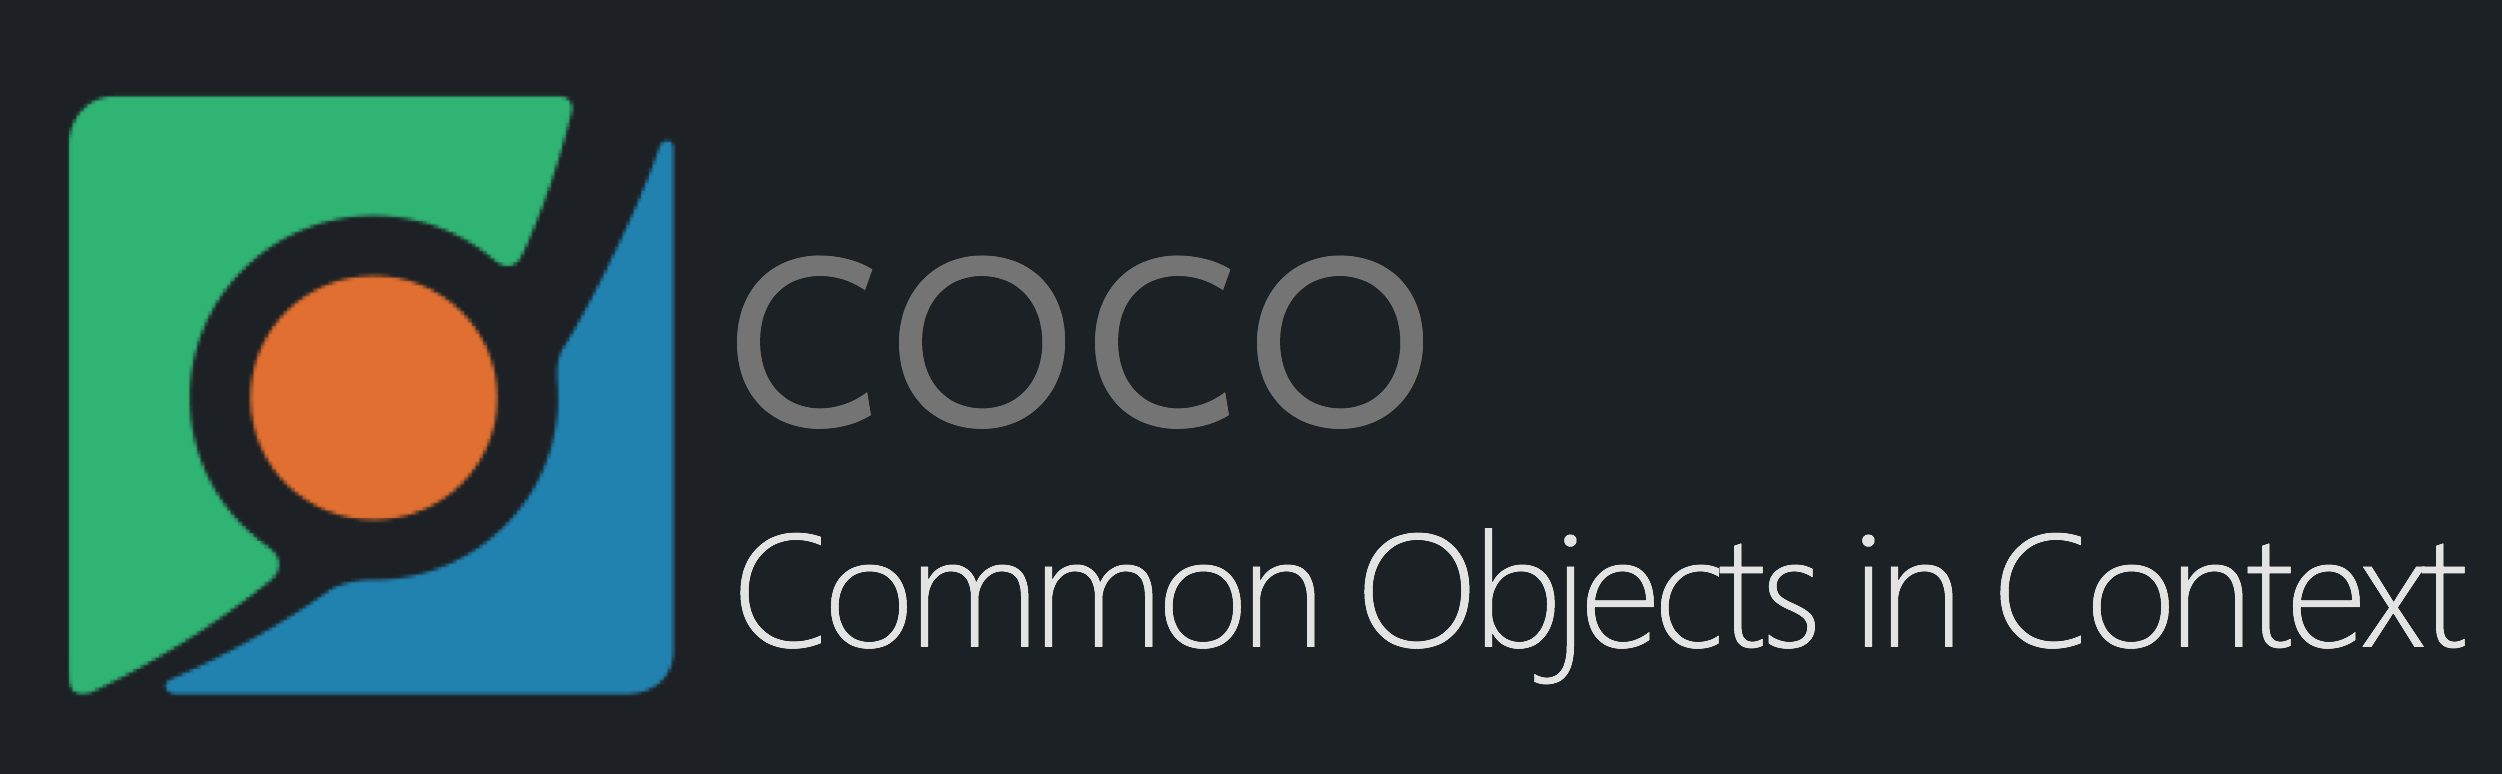
</div>

<br>
COCO, Common Objects in Context, is a large-scale object detection, segmentation, and captioning dataset for images, isolating objects in images. For example, in this image with snowboarders, we see that the dataset has segmented the different snowboarders as well as the boards from the image.
<br>
<div>
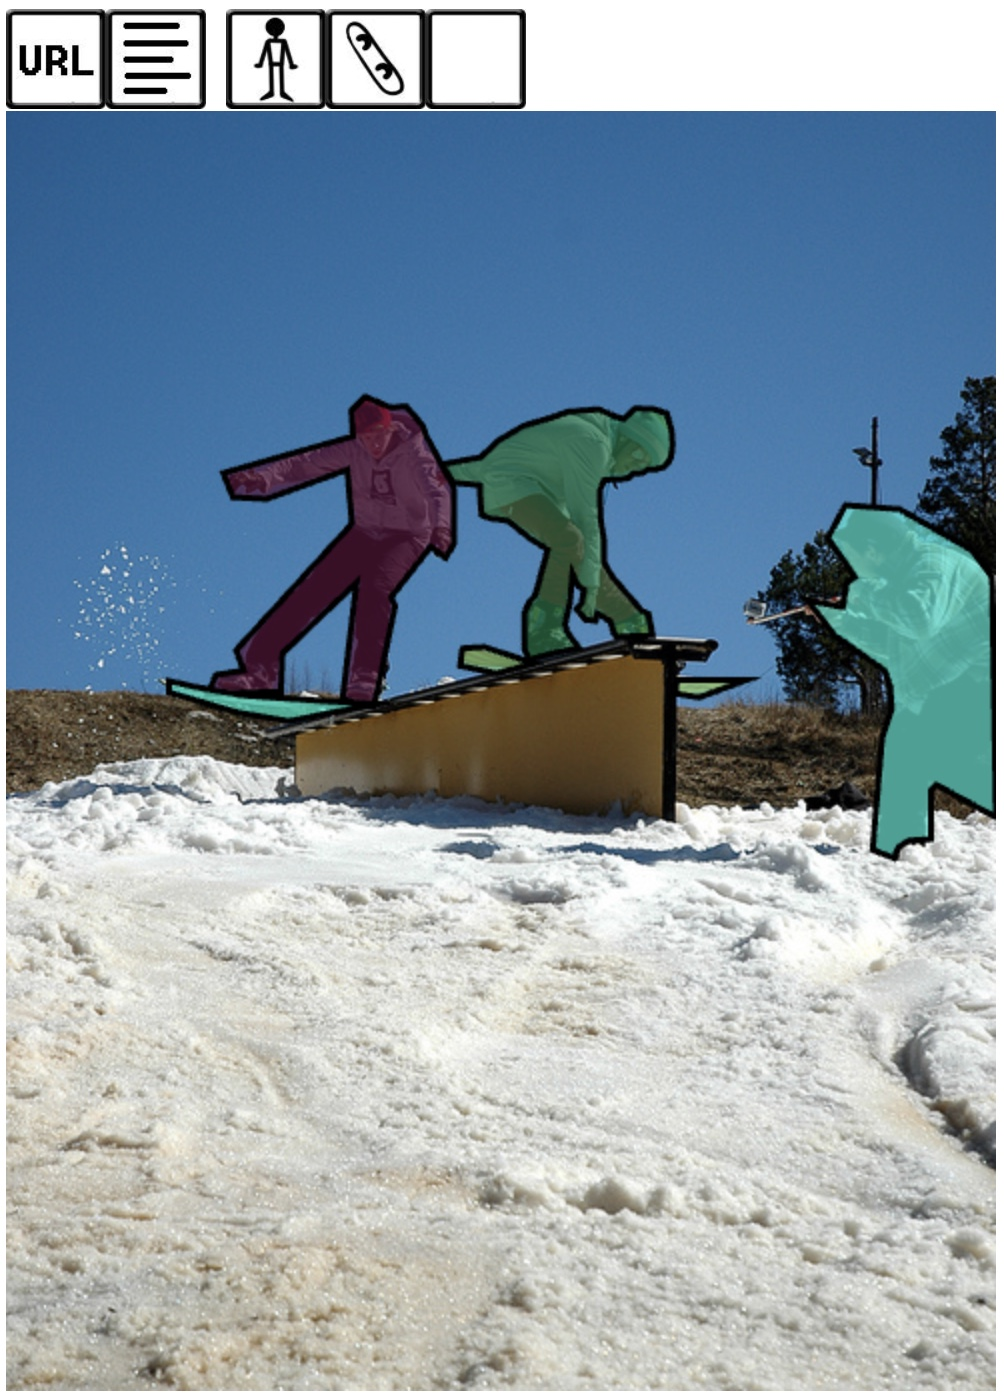
</div>

In [ ]:
!aws sso login

To start, let's take a look at what we can do with Daft. We can install daft with `pip install daft` and it'll work out of the box. 

With our native integration with Delta Lake, we can `pip install -U "daft[deltalake]"` which will install the deltalake Python package to fetch metadata about the Delta Lake table, such as paths to underlying Parquet files and table statistics. We're not dealing with any jars or JVMs needing to be installed, this is all pure Python & Rust code. 

It. just. works. :)

In [ ]:
!uv pip install -U "daft[deltalake]"

Daft can read from several data sources such as Parquet, CSV, JSON, Pandas, Arrow, etc. Daft also supports reading from catalogs like Delta Lake, Iceberg, and Hudi.

First, let's read the parquet files from the COCO dataset.

In [1]:
import os
import daft
images_df = daft.read_parquet("s3://daft-public-data/coco-2017-parquet/image_buckets.parquet")
images_df

licenseInt64,file_nameUtf8,coco_urlUtf8,heightInt64,widthInt64,date_capturedUtf8,flickr_urlUtf8,idInt64,bucket_urlUtf8


No data to display? Remember, Daft is **lazy**! This means that contents from the DataFrame will not be materialized until we explicity tell Daft to do so. So let's call a `.show()` to materialize the DataFrame.

In [2]:
images_df.show(5)

licenseInt64,file_nameUtf8,coco_urlUtf8,heightInt64,widthInt64,date_capturedUtf8,flickr_urlUtf8,idInt64,bucket_urlUtf8
4,000000397133.jpg,http://images.cocodataset.org/val2017/000000397133.jpg,427,640,2013-11-14 17:02:52,http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg,397133,s3://daft-public-data/coco-2017-parquet/images/000000397133.jpg
1,000000037777.jpg,http://images.cocodataset.org/val2017/000000037777.jpg,230,352,2013-11-14 20:55:31,http://farm9.staticflickr.com/8429/7839199426_f6d48aa585_z.jpg,37777,s3://daft-public-data/coco-2017-parquet/images/000000037777.jpg
4,000000252219.jpg,http://images.cocodataset.org/val2017/000000252219.jpg,428,640,2013-11-14 22:32:02,http://farm4.staticflickr.com/3446/3232237447_13d84bd0a1_z.jpg,252219,s3://daft-public-data/coco-2017-parquet/images/000000252219.jpg
1,000000087038.jpg,http://images.cocodataset.org/val2017/000000087038.jpg,480,640,2013-11-14 23:11:37,http://farm8.staticflickr.com/7355/8825114508_b0fa4d7168_z.jpg,87038,s3://daft-public-data/coco-2017-parquet/images/000000087038.jpg
6,000000174482.jpg,http://images.cocodataset.org/val2017/000000174482.jpg,388,640,2013-11-14 23:16:55,http://farm8.staticflickr.com/7020/6478877255_242f741dd1_z.jpg,174482,s3://daft-public-data/coco-2017-parquet/images/000000174482.jpg


Daft has built-in expressions to do common operations with multimodal data. For example, people often store images separately from their Delta Lake tables. In our DataFrame, we have a `bucket_url` column of S3 links that point to images. With Daft, we can download these images and decode them.

In [3]:
images_df.with_column(
    "image",
    images_df["bucket_url"].url.download().image.decode()
).show(5)

╭─────────┬──────────────────┬──────────────────────────┬────────────┬────────┬─────────────────────────┬──────────────╮
│ license ┆ file_name        ┆ coco_url                 ┆      …     ┆ id     ┆ bucket_url              ┆ image        │
│ ---     ┆ ---              ┆ ---                      ┆            ┆ ---    ┆ ---                     ┆ ---          │
│ Int64   ┆ Utf8             ┆ Utf8                     ┆ (4 hidden) ┆ Int64  ┆ Utf8                    ┆ Image[MIXED] │
╞═════════╪══════════════════╪══════════════════════════╪════════════╪════════╪═════════════════════════╪══════════════╡
│ 4       ┆ 000000397133.jpg ┆ http://images.cocodatase ┆ …          ┆ 397133 ┆ s3://daft-public-data/c ┆ <Image>      │
│         ┆                  ┆ t.org…                   ┆            ┆        ┆ oco-20…                 ┆              │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 1       ┆ 000000037777.jpg ┆ http://images.cocodatase ┆ …          ┆ 37777  ┆ s3://daft-public-data/c ┆ <Image>      │
│         ┆                  ┆ t.org…                   ┆            ┆        ┆ oco-20…                 ┆              │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 4       ┆ 000000252219.jpg ┆ http://images.cocodatase ┆ …          ┆ 252219 ┆ s3://daft-public-data/c ┆ <Image>      │
│         ┆                  ┆ t.org…                   ┆            ┆        ┆ oco-20…                 ┆              │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 1       ┆ 000000087038.jpg ┆ http://images.cocodatase ┆ …          ┆ 87038  ┆ s3://daft-public-data/c ┆ <Image>      │
│         ┆                  ┆ t.org…                   ┆            ┆        ┆ oco-20…                 ┆              │
├╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 6       ┆ 000000174482.jpg ┆ http://images.cocodatase ┆ …          ┆ 174482 ┆ s3://daft-public-data/c ┆ <Image>      │
│         ┆                  ┆ t.org…                   ┆            ┆        ┆ oco-20…                 ┆              │
╰─────────┴──────────────────┴──────────────────────────┴────────────┴────────┴─────────────────────────┴──────────────╯

(Showing first 5 rows)

You can do this with other DataFrame libraries by writing UDFs for URL downloads and image decodes. The magic of Daft is that these expressions are natively implemented, and also written in Rust for performance! One thing to point out is that, if you were to monitor your machine's resource usage, Daft maximizes both network IO and CPU usage through streaming.

When designing an execution engine, there are 2 considerations for synchronizing data flow between operators: **bulk synchronous**  or **streaming**.

In a bulk synchronous model, operators work in distinct, sequential stages where each operator fully completes its execution before passing its results to the next operator. With this model, it will use a lot of memory and resources to download **all** URLs and then decode **all** images, very inefficient. 
<br>
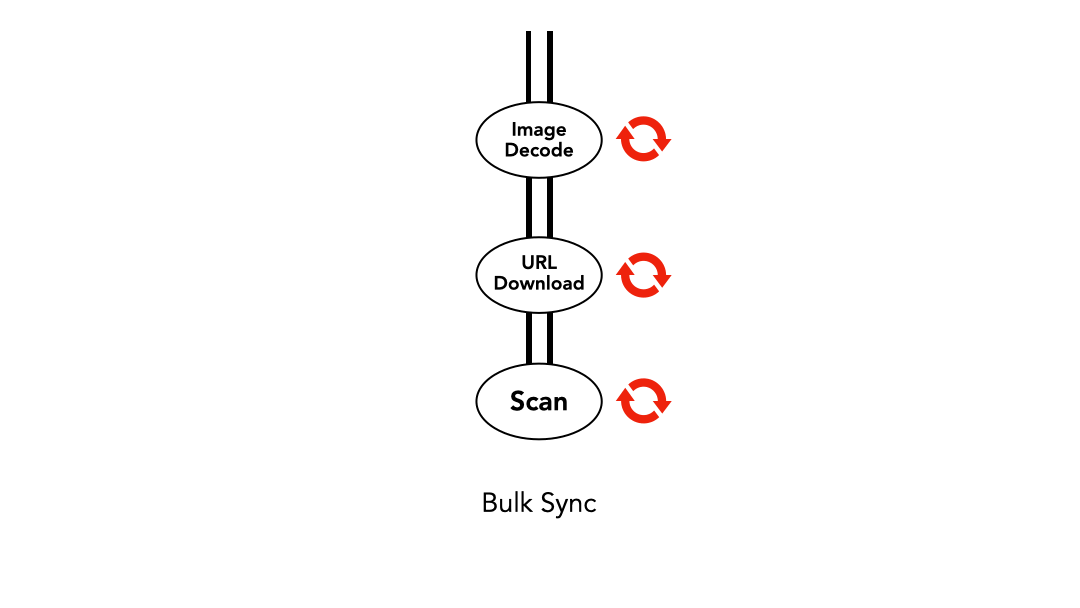

Daft's execution engine uses a streaming model, where data flows continuously between operators in smaller, incremental chunks. Each operator processes data as it is consumed and passes results downstream without waiting. With this model, the parquet reads, URL downloads, and image decodes are all pipelined together and executed in parallel. Daft here is maximizing resource utilization across different steps, utilizing both CPU and network at the same time.
<br>
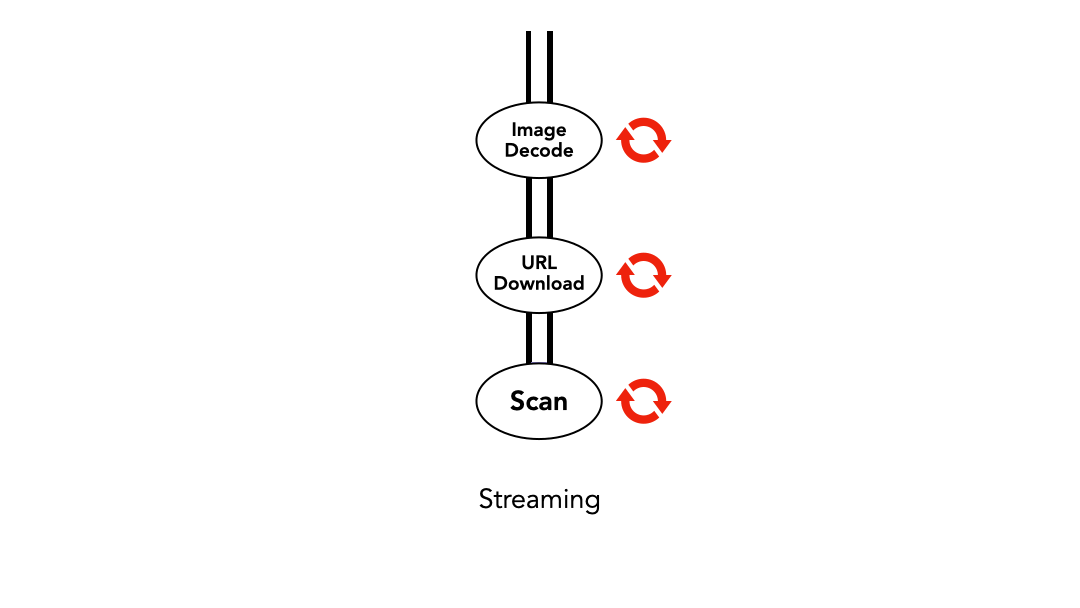

# Delta Lake

Now let's take a look at how Daft and Delta Lake can work together. Let's create a DataFrame of categories and annotations from the same COCO dataset we read earlier and join that with our previous images DataFrame.

In [4]:
categories_df = daft.read_parquet("s3://daft-public-data/coco-2017-parquet/categories.parquet")
categories_df = categories_df.with_column_renamed("id", "category_id")
categories_df

supercategoryUtf8,category_idInt64,nameUtf8


In [5]:
annotations_df = daft.read_parquet("s3://daft-public-data/coco-2017-parquet/annotations.parquet")
annotations_df = annotations_df.with_column_renamed("id", "annotation_id")
annotations_df

areaFloat64,iscrowdInt64,image_idInt64,bboxList[Float64],category_idInt64,annotation_idInt64,segmentation_polygonsList[List[Float64]],"segmentation_rleStruct[counts: List[Int64], size: List[Int64]]"


In [6]:
df = images_df.join(annotations_df, left_on="id", right_on="image_id")
df = df.join(categories_df, on = "category_id")
df.show()

category_idInt64,licenseInt64,file_nameUtf8,coco_urlUtf8,heightInt64,widthInt64,date_capturedUtf8,flickr_urlUtf8,idInt64,bucket_urlUtf8,areaFloat64,iscrowdInt64,image_idInt64,bboxList[Float64],annotation_idInt64,segmentation_polygonsList[List[Float64]],"segmentation_rleStruct[counts: List[Int64], size: List[Int64]]",supercategoryUtf8,nameUtf8
18,2,000000289343.jpg,http://images.cocodataset.org/val2017/000000289343.jpg,640,529,2013-11-15 00:35:14,http://farm5.staticflickr.com/4029/4669549715_7db3735de0_z.jpg,289343,s3://daft-public-data/coco-2017-parquet/images/000000289343.jpg,702.1057499999998,0,289343,"[473.07, 395.93, 38.65, 28.67]",1768,"[[510.66, 423.01, 511.72, 420.03, 510.45, 416, 510.34, 413.02, 510.77, 410.26, 510.77, 407.5, 510.34, 405.16, 511.51, 402.83, 511.41, 400.49, 510.24, 398.16, 509.39, 397.31, 504.61, 399.22, 502.17, 399.64, 500.89, 401.66, 500.47, 402.08, 499.09, 401.87, 495.79, 401.98, 490.59, 401.77, 488.79, 401.77, 485.39, 398.58, 483.9, 397.31, 481.56, 396.35, 478.48, 395.93, 476.68, 396.03, 475.4, 396.77, 473.92, 398.79, 473.28, 399.96, 473.49, 401.87, 474.56, 403.47, 473.07, 405.59, 473.39, 407.71, 476.68, 409.41, 479.23, 409.73, 481.56, 410.69, 480.4, 411.85, 481.35, 414.93, 479.86, 418.65, 477.32, 420.03, 476.04, 422.58, 479.02, 422.58, 480.29, 423.01, 483.79, 419.93, 486.66, 416.21, 490.06, 415.57, 492.18, 416.85, 491.65, 420.24, 492.82, 422.9, 493.56, 424.39, 496.43, 424.6, 498.02, 423.01, 498.13, 421.31, 497.07, 420.03, 497.07, 415.15, 496.33, 414.51, 501.1, 411.96, 502.06, 411.32, 503.02, 415.04, 503.33, 418.12, 501.1, 420.24, 498.98, 421.63, 500.47, 424.39, 505.03, 423.32, 506.2, 421.31, 507.69, 419.5, 506.31, 423.32, 510.03, 423.01, 510.45, 423.01]]",None,animal,dog
18,1,000000061471.jpg,http://images.cocodataset.org/val2017/000000061471.jpg,480,640,2013-11-15 01:18:25,http://farm1.staticflickr.com/11/12252917_d0098232e4_z.jpg,61471,s3://daft-public-data/coco-2017-parquet/images/000000061471.jpg,27718.476299999995,0,61471,"[272.1, 200.23, 151.97, 279.77]",1773,"[[289.74, 443.39, 302.29, 445.32, 308.09, 427.94, 310.02, 416.35, 304.23, 405.73, 300.14, 385.01, 298.23, 359.52, 295.04, 365.89, 282.3, 362.71, 275.29, 358.25, 277.2, 346.14, 280.39, 339.13, 284.85, 339.13, 291.22, 338.49, 293.77, 335.95, 295.04, 326.39, 297.59, 317.47, 289.94, 309.82, 287.4, 288.79, 286.12, 275.41, 284.21, 271.59, 279.11, 276.69, 275.93, 275.41, 272.1, 271.59, 274.01, 267.77, 275.93, 265.22, 277.84, 264.58, 282.3, 251.2, 293.77, 238.46, 307.79, 221.25, 314.79, 211.69, 325.63, 205.96, 338.37, 205.32, 347.29, 205.32, 353.03, 205.32, 361.31, 200.23, 367.95, 202.02, 372.27, 205.8, 382.52, 215.51, 388.46, 225.22, 399.25, 235.47, 399.25, 252.74, 390.08, 247.34, 386.84, 247.34, 388.46, 256.52, 397.09, 268.93, 413.28, 298.6, 421.91, 356.87, 424.07, 391.4, 422.99, 409.74, 420.29, 428.63, 415.43, 433.48, 407.88, 414.6, 405.72, 391.94, 401.41, 404.89, 394.39, 420.54, 391.69, 435.64, 391.15, 447.51, 387.38, 461, 384.68, 480, 354.47, 477.73, 363.1, 433.48, 370.65, 405.43, 369.03, 394.64, 361.48, 398.95, 355.54, 403.81, 351.77, 403.81, 343.68, 403.27, 339.36, 402.19, 335.58, 404.89, 333.42, 411.9, 332.34, 416.76, 333.42, 425.93, 334.5, 430.79, 336.12, 435.64, 321.01, 464.78, 316.16, 468.01, 307.53, 472.33, 297.28, 472.33, 290.26, 471.25, 285.94, 472.33, 283.79, 464.78, 280.01, 462.62, 284.33, 454.53, 285.94, 453.45, 282.71, 448.59, 288.64, 444.27, 291.88, 443.74]]",None,animal,dog
18,3,000000472375.jpg,http://images.cocodataset.org/val2017/000000472375.jpg,612,612,2013-11-15 12:52:52,http://farm6.staticflickr.com/5333/8941457326_2c96e58e7f_z.jpg,472375,s3://daft-public-data/coco-2017-parquet/images/000000472375.jpg,78969.31690000003,0,472375,"[124.71, 196.18, 372.85, 356.81]",2551,"[[147.76, 396.11, 158.48, 355.91, 153.12, 347.87, 137.04, 346.26, 125.25, 339.29, 124.71, 301.77, 139.18, 262.64, 159.55, 232.63, 185.82, 209.04, 226.01, 196.72, 244.77, 196.18, 251.74, 202.08, 275.33, 224.59, 283.9, 232.63, 295.16, 240.67, 315.53, 247.1

Daft has native support for read and writes of Delta Lake tables, so now we can write our joined DataFrames to delta lake partitioned by categories.

In [7]:
df.write_deltalake("images_table", partition_cols=["supercategory"])

🗡️ 🐟 ScanTaskSource: 00:00 

🗡️ 🐟 Project: 00:00 

🗡️ 🐟 InnerHashJoinProbe: 00:00 

🗡️ 🐟 InnerHashJoinProbe: 00:00 

🗡️ 🐟 Project: 00:00 

🗡️ 🐟 PartitionedDeltalakeSink: 00:00 

operationUtf8,rowsInt64,file_sizeInt64,file_nameUtf8
ADD,1323,487603,0-729cd281-3d49-4ff3-8fed-d6964c9ef748-0.parquet
ADD,2835,1027732,0-172e2dda-6ab2-47a7-8962-171d398a53be-0.parquet
ADD,3687,1113184,0-f984fd48-3ce9-4513-b39e-e64040f70b5f-0.parquet
ADD,1881,744061,0-2e71c2cc-8bb2-476a-b10c-33b172601c88-0.parquet
ADD,558,243797,0-8306bf74-911f-490a-88e5-5272f1add163-0.parquet
ADD,1991,833967,0-913c4b58-e423-420b-a563-d8ac8d0cf646-0.parquet
ADD,3434,1304389,0-d0cd6ccd-afdc-4adc-91b4-7c5d52824bf9-0.parquet
ADD,2700,1373140,0-95653ae4-303a-4010-b5f2-ef7ca03efc55-0.parquet


And just for fun, let's read back the Delta Lake table to make sure the write actually worked.

In [8]:
df = daft.read_deltalake("images_table")
df.collect()

DeltaLakeScanOperator(None) has partitioning keys = [PartitionField(supercategory#Utf8)], but no partition filter was specified. This will result in a full table scan.


category_idInt64,licenseInt64,file_nameUtf8,coco_urlUtf8,heightInt64,widthInt64,date_capturedUtf8,flickr_urlUtf8,idInt64,bucket_urlUtf8,areaFloat64,iscrowdInt64,image_idInt64,bboxList[Float64],annotation_idInt64,segmentation_polygonsList[List[Float64]],"segmentation_rleStruct[counts: List[Int64], size: List[Int64]]",supercategoryUtf8,nameUtf8
72,3,000000464476.jpg,http://images.cocodataset.org/val2017/000000464476.jpg,375,500,2013-11-14 18:23:40,http://farm1.staticflickr.com/24/35275654_7d9397809b_z.jpg,464476,s3://daft-public-data/coco-2017-parquet/images/000000464476.jpg,31935.485049999996,0,464476,"[279.11, 209.81, 206.02, 160.44]",29131,"[[279.11, 370.25, 281.96, 214.56, 283.86, 209.81, 481.33, 215.51, 485.13, 370.25]]",None,electronic,tv
72,1,000000068833.jpg,http://images.cocodataset.org/val2017/000000068833.jpg,480,640,2013-11-14 16:32:09,http://farm8.staticflickr.com/7152/6427642465_a62732d040_z.jpg,68833,s3://daft-public-data/coco-2017-parquet/images/000000068833.jpg,2293.6756000000005,0,68833,"[97.28, 202.37, 60.28, 39.91]",29249,"[[100.23, 203.21, 133.68, 202.93, 155.88, 202.37, 156.58, 202.37, 156.86, 228.93, 157.56, 241.29, 98.13, 242.28, 98.41, 238.2, 97.28, 203.35]]",None,electronic,tv
72,3,000000433915.jpg,http://images.cocodataset.org/val2017/000000433915.jpg,480,640,2013-11-14 19:04:41,http://farm4.staticflickr.com/3519/3243850638_c7c6c7186f_z.jpg,433915,s3://daft-public-data/coco-2017-parquet/images/000000433915.jpg,265862.40795,0,433915,"[1.08, 1.72, 574.7, 471.39]",29555,"[[388.52, 2.8, 567.17, 15.71, 574.71, 234.19, 575.78, 379.48, 572.56, 467.73, 574.71, 473.11, 319.64, 467.73, 1.08, 473.11, 3.23, 310.6, 1.08, 130.87, 2.15, 3.87, 189.42, 1.72]]",None,electronic,tv
72,2,000000149222.jpg,http://images.cocodataset.org/val2017/000000149222.jpg,383,500,2013-11-15 15:11:24,http://farm1.staticflickr.com/23/33195394_22d605f377_z.jpg,149222,s3://daft-public-data/coco-2017-parquet/images/000000149222.jpg,61254.977150000006,0,149222,"[3.88, 0, 287.98, 251.13]",29829,"[[4.46, 19.19, 12.67, 95.55, 16.77, 133.31, 33.94, 244.34, 45.57, 251.13, 170.65, 231.74, 291.86, 197.8, 275.37, 1.94, 85.33, 0, 3.88, 4.85, 7.76, 39.75]]",None,electronic,tv
72,1,000000017379.jpg,http://images.cocodataset.org/val2017/000000017379.jpg,640,478,2013-11-15 01:16:56,http://farm6.staticflickr.com/5123/5316824279_9f0a0584c7_z.jpg,17379,s3://daft-public-data/coco-2017-parquet/images/000000017379.jpg,16606.205650000004,0,17379,"[145.26, 214.29, 165.39, 107.87]",30246,"[[284.76, 320.72, 267.51, 322.16, 247.37, 322.16, 211.42, 322.16, 149.57, 320.72, 145.26, 287.64, 152.45, 214.29, 310.65, 220.04, 307.78, 271.82, 309.21, 304.9, 284.76, 322.16]]",None,electronic,tv
72,1,000000361586.jpg,http://images.cocodataset.org/val2017/000000361586.jpg,360,640,2013-11-14 17:02:18,http://farm5.staticflickr.com/4014/4590440049_5de9e905a2_z.jpg,361586,s3://daft-public-data/coco-2017-parquet/images/000000361586.jpg,924.0371499999999,0,361586,"[352.62, 201.36, 31.35, 38.76]",30416,"[[380.6, 201.36, 383.97, 226.3, 378.91, 226.97, 379.58, 233.04, 379.92, 236.41, 370.15, 240.12, 368.46, 235.73, 355.66, 238.43, 352.62, 206.75]]",None,electronic,tv
72,1,000000127987.jpg,http://images.cocodataset.org/val2017/000000127987.jpg,426,640,2013-11-15 15:10:55,http://farm4.staticflickr.com/3309/3471813007_ee8551f446_z.jpg,127987,s3://daft-public-data/coco-2017-parquet/images/000000127987.jpg,49844.547699999996,0,127987,"[24.14, 0, 323.24, 235.69]",31127,"[[24.14, 0, 60.79, 184.44, 67.21, 192.6, 84.42, 196.14, 137.97, 205.2, 152.34, 203.82, 153.52, 196.53, 147.45, 195.19, 144.92, 192.66, 142.39, 169.42, 139.11, 164.11, 137.59, 158.55, 137.59, 155.02, 136.08, 143.9, 136.84, 140.61, 138.35, 117.11, 143.91, 108.52, 154.27, 100.19, 173.47, 96.14, 190.4, 97.15, 198.25, 101.95, 205.61, 109.54, 212.3, 111.1, 219.21, 117.34, 223.23, 124.48, 222.86, 130.48, 217.94, 138.35, 209.67, 144.06, 207.7, 147.21, 207.31, 153.12, 208.88, 160.4, 204.95, 174.77, 196.91, 195.57, 192.37, 199.46, 177.4

Ah red warning! Makes sense because `.collect()` will read all folders in the table and get all the data. 

To take full advatange of the Delta Lake table format, let's only read partitions that we care about. So what if I only want images with animals? Instead of reading all of the data in the delta table, we will only read the "animal" partition with `.where()`. Let's also simply our DataFrame and select a couple columns to show.

In [9]:
df = daft.read_deltalake("images_table")
df = df.where(df["supercategory"]=="animal")
df = df.select("id","annotation_id","supercategory","bbox", "bucket_url")

So what's happening under the hood right now? We can use `.explain()` to look at the Logical and Physical plans for filter and select operations.

In [10]:
df.explain(True, format="mermaid")

```mermaid
flowchart TD
subgraph unoptimized["Unoptimized LogicalPlan"]
direction TB
unoptimizedProject0["Project: col(id), col(annotation_id), col(supercategory), col(bbox),
col(bucket_url)"]
unoptimizedFilter1["Filter: col(supercategory) == lit('animal')"]
unoptimizedSource2["PythonScanOperator: DeltaLakeScanOperator(None)
File schema = category_id#Int64, license#Int64, file_name#Utf8,
coco_url#Utf8, height#Int64, width#Int64, date_captured#Utf8,
flickr_url#Utf8, id#Int64, bucket_url#Utf8, area#Float64,
iscrowd#Int64, image_id#Int64, bbox#List(Float64), annotation_id#Int64,
segmentation_polygons#List(List(Float64)), segmentation_rle#Struct([Field
{ name: 'counts', dtype: List(Int64), metadata: {} }, Field { name: 'size',
dtype: List(Int64), metadata: {} }]), supercategory#Utf8, name#Utf8
Partitioning keys = [PartitionField(supercategory#Utf8)]
Output schema = category_id#Int64, license#Int64, file_name#Utf8,
coco_url#Utf8, height#Int64, width#Int64, date_captured#Utf8,
flickr_url#Utf8, id#Int64, bucket_url#Utf8, area#Float64,
iscrowd#Int64, image_id#Int64, bbox#List(Float64), annotation_id#Int64,
segmentation_polygons#List(List(Float64)), segmentation_rle#Struct([Field
{ name: 'counts', dtype: List(Int64), metadata: {} }, Field { name: 'size',
dtype: List(Int64), metadata: {} }]), supercategory#Utf8, name#Utf8"]
unoptimizedSource2 --> unoptimizedFilter1
unoptimizedFilter1 --> unoptimizedProject0
end

subgraph optimized["Optimized LogicalPlan"]
direction TB
optimizedProject0["Project: col(id), col(annotation_id), col(supercategory), col(bbox),
col(bucket_url)
Stats = { Approx num rows = 2,700, Approx size bytes = 336.51 KiB, Accumulated
selectivity = 1.00 }"]
optimizedSource1["Num Scan Tasks = 1
File schema = category_id#Int64, license#Int64, file_name#Utf8,
coco_url#Utf8, height#Int64, width#Int64, date_captured#Utf8,
flickr_url#Utf8, id#Int64, bucket_url#Utf8, area#Float64,
iscrowd#Int64, image_id#Int64, bbox#List(Float64), annotation_id#Int64,
segmentation_polygons#List(List(Float64)), segmentation_rle#Struct([Field
{ name: 'counts', dtype: List(Int64), metadata: {} }, Field { name: 'size',
dtype: List(Int64), metadata: {} }]), supercategory#Utf8, name#Utf8
Partitioning keys = [PartitionField(supercategory#Utf8)]
Projection pushdown = [id, annotation_id, supercategory, bbox, bucket_url]
Partition Filter = col(supercategory) == lit('animal')
Output schema = id#Int64, bucket_url#Utf8, bbox#List(Float64),
annotation_id#Int64, supercategory#Utf8
Stats = { Approx num rows = 2,700, Approx size bytes = 336.51 KiB, Accumulated
selectivity = 1.00 }"]
optimizedSource1 --> optimizedProject0
end

subgraph physical["Physical Plan"]
direction TB
physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode0["Project: col(id), col(annotation_id), col(supercategory), col(bbox),
col(bucket_url)
Resource request = None
Stats = { Approx num rows = 2,700, Approx size bytes = 336.51 KiB, Accumulated
selectivity = 1.00 }
"]
physicaldaft_local_execution::sources::source::SourceNode1["ScanTaskSource:
Num Scan Tasks = 1
Estimated Scan Bytes = 1373140
Pushdowns: {projection: [id, annotation_id, supercategory, bbox, bucket_url],
partition_filter: col(supercategory) == lit('animal')}
Schema: {category_id#Int64, license#Int64, file_name#Utf8,
coco_url#Utf8, height#Int64, width#Int64, date_captured#Utf8,
flickr_url#Utf8, id#Int64, bucket_url#Utf8, area#Float64,
iscrowd#Int64, image_id#Int64, bbox#List(Float64), annotation_id#Int64,
segmentation_polygons#List(List(Float64)), segmentation_rle#Struct([Field
{ name: 'counts', dtype: List(Int64), metadata: {} }, Field { name: 'size',
dtype: List(Int64), metadata: {} }]), supercategory#Utf8, name#Utf8}
Scan Tasks: [
{File {/Users/desmond/AiAiAi/0-Demo/images_table/supercategory=animal/0-
95653ae4-303a-4010-b5f2-ef7ca03efc55-0.parquet}}
]
Stats = { Approx num rows = 2,700, Approx size bytes = 336.51 KiB, Accumulated
selectivity = 1.00 }
"]
physicaldaft_local_execution::sources::source::SourceNode1 --> physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode0
end

unoptimized --> optimized
optimized --> physical
```


Daft supports data skipping, ensuring that only data that matches your `df.where(...)` filter will be read, often skipping entire files/partitions. We can actually see this in our Logical and Physical Plan.

First, we have the unoptimized LogicalPlan which follows the literal order of operations: read all files, filter.

Then, Daft will optimize the LogicalPlan to save time and computing resources by only reading a single partition from disk, in this case `animal`.

Now the LogicalPlan is translated into a Physical Plan. We can visualize the data skipping in the Physical Plan under Scan Tasks, where only data in `../images_table/supercategory=animal` are being read.

Earlier we did `df.where(df["supercategory"]=="animal")`. We can visualize the data skipping in the Physical Plan under Scan Tasks, where only data in images_table/supercategory=animal are being read.

# Data Catalogs

A production-ready data engine needs to work seamlessly with data catalogs. So on top of Deltalake, Daft works easily with Unity Catalog.

In [11]:
from daft.unity_catalog import UnityCatalog

unity = UnityCatalog(
    endpoint=os.environ["EVENTUAL_DATABRICKS_ENDPOINT"],
    token=os.environ["DATABRICKS_API_KEY"]
)

print(unity.list_tables("jaytest-unity.default"))

['jaytest-unity.default.coco_annotations', 'jaytest-unity.default.coco_categories', 'jaytest-unity.default.coco_cropped', 'jaytest-unity.default.coco_images', 'jaytest-unity.default.nation']


In [12]:
from daft import Session

# to use a catalog, we create a new empty session and attach the catalog to it
sess = Session()
catalog = daft.Catalog.from_unity(unity)
sess.attach(catalog)

In [13]:
catalog.list_tables("jaytest-unity.default")

['jaytest-unity.default.coco_annotations',
 'jaytest-unity.default.coco_categories',
 'jaytest-unity.default.coco_cropped',
 'jaytest-unity.default.coco_images',
 'jaytest-unity.default.nation']

Previewing the contents of a table from Unity Catalog takes only seconds!

In [14]:
%%time
sess.get_table("jaytest-unity.default.coco_images").show(5)

licenseInt64,file_nameUtf8,coco_urlUtf8,heightInt64,widthInt64,date_capturedUtf8,flickr_urlUtf8,idInt64,bucket_urlUtf8
4,000000397133.jpg,http://images.cocodataset.org/val2017/000000397133.jpg,427,640,2013-11-14 17:02:52,http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg,397133,s3://daft-public-data/coco-2017-parquet/images/000000397133.jpg
1,000000037777.jpg,http://images.cocodataset.org/val2017/000000037777.jpg,230,352,2013-11-14 20:55:31,http://farm9.staticflickr.com/8429/7839199426_f6d48aa585_z.jpg,37777,s3://daft-public-data/coco-2017-parquet/images/000000037777.jpg
4,000000252219.jpg,http://images.cocodataset.org/val2017/000000252219.jpg,428,640,2013-11-14 22:32:02,http://farm4.staticflickr.com/3446/3232237447_13d84bd0a1_z.jpg,252219,s3://daft-public-data/coco-2017-parquet/images/000000252219.jpg
1,000000087038.jpg,http://images.cocodataset.org/val2017/000000087038.jpg,480,640,2013-11-14 23:11:37,http://farm8.staticflickr.com/7355/8825114508_b0fa4d7168_z.jpg,87038,s3://daft-public-data/coco-2017-parquet/images/000000087038.jpg
6,000000174482.jpg,http://images.cocodataset.org/val2017/000000174482.jpg,388,640,2013-11-14 23:16:55,http://farm8.staticflickr.com/7020/6478877255_242f741dd1_z.jpg,174482,s3://daft-public-data/coco-2017-parquet/images/000000174482.jpg


CPU times: user 305 ms, sys: 92.7 ms, total: 398 ms
Wall time: 2.12 s


# SQL

Some queries are easier to express in SQL, and sometimes SQL is simply someone's preferred language for working with data. Daft provides a fully functional SQL engine for the most common SQL operators.

In [15]:
%%time

# select all columns
sess.sql("""
SELECT
    *
FROM
    "jaytest-unity.default.coco_images" as images
""").show(5)

licenseInt64,file_nameUtf8,coco_urlUtf8,heightInt64,widthInt64,date_capturedUtf8,flickr_urlUtf8,idInt64,bucket_urlUtf8
4,000000397133.jpg,http://images.cocodataset.org/val2017/000000397133.jpg,427,640,2013-11-14 17:02:52,http://farm7.staticflickr.com/6116/6255196340_da26cf2c9e_z.jpg,397133,s3://daft-public-data/coco-2017-parquet/images/000000397133.jpg
1,000000037777.jpg,http://images.cocodataset.org/val2017/000000037777.jpg,230,352,2013-11-14 20:55:31,http://farm9.staticflickr.com/8429/7839199426_f6d48aa585_z.jpg,37777,s3://daft-public-data/coco-2017-parquet/images/000000037777.jpg
4,000000252219.jpg,http://images.cocodataset.org/val2017/000000252219.jpg,428,640,2013-11-14 22:32:02,http://farm4.staticflickr.com/3446/3232237447_13d84bd0a1_z.jpg,252219,s3://daft-public-data/coco-2017-parquet/images/000000252219.jpg
1,000000087038.jpg,http://images.cocodataset.org/val2017/000000087038.jpg,480,640,2013-11-14 23:11:37,http://farm8.staticflickr.com/7355/8825114508_b0fa4d7168_z.jpg,87038,s3://daft-public-data/coco-2017-parquet/images/000000087038.jpg
6,000000174482.jpg,http://images.cocodataset.org/val2017/000000174482.jpg,388,640,2013-11-14 23:16:55,http://farm8.staticflickr.com/7020/6478877255_242f741dd1_z.jpg,174482,s3://daft-public-data/coco-2017-parquet/images/000000174482.jpg


CPU times: user 139 ms, sys: 25 ms, total: 164 ms
Wall time: 945 ms


In [16]:
# select specific columns
sess.sql("""
SELECT
    id, bucket_url, height, width
FROM
    "jaytest-unity.default.coco_images" as images
""").show(5)

idInt64,bucket_urlUtf8,heightInt64,widthInt64
397133,s3://daft-public-data/coco-2017-parquet/images/000000397133.jpg,427,640
37777,s3://daft-public-data/coco-2017-parquet/images/000000037777.jpg,230,352
252219,s3://daft-public-data/coco-2017-parquet/images/000000252219.jpg,428,640
87038,s3://daft-public-data/coco-2017-parquet/images/000000087038.jpg,480,640
174482,s3://daft-public-data/coco-2017-parquet/images/000000174482.jpg,388,640


In [17]:
# filter
sess.sql("""
SELECT
    id, bucket_url, height, width
FROM
    "jaytest-unity.default.coco_images" as images
WHERE
    width < 500
""").show(5)

idInt64,bucket_urlUtf8,heightInt64,widthInt64
37777,s3://daft-public-data/coco-2017-parquet/images/000000037777.jpg,230,352
6818,s3://daft-public-data/coco-2017-parquet/images/000000006818.jpg,640,427
480985,s3://daft-public-data/coco-2017-parquet/images/000000480985.jpg,500,375
331352,s3://daft-public-data/coco-2017-parquet/images/000000331352.jpg,500,351
491497,s3://daft-public-data/coco-2017-parquet/images/000000491497.jpg,500,375


In [18]:
# count
sess.sql("""
SELECT
    count(*)
FROM 
    "jaytest-unity.default.coco_images" as images
WHERE
    width < 500
""").show(5)

countUInt64
1179


In [19]:
# sort and mix SQL with dataframes
sess.sql("""
SELECT 
    id, bucket_url, height, width
FROM 
    "jaytest-unity.default.coco_images" as images
WHERE 
    width < 500
""").sort("width", desc=True).show(5)

idInt64,bucket_urlUtf8,heightInt64,widthInt64
407825,s3://daft-public-data/coco-2017-parquet/images/000000407825.jpg,500,499
28809,s3://daft-public-data/coco-2017-parquet/images/000000028809.jpg,500,498
236845,s3://daft-public-data/coco-2017-parquet/images/000000236845.jpg,640,495
554579,s3://daft-public-data/coco-2017-parquet/images/000000554579.jpg,640,494
464522,s3://daft-public-data/coco-2017-parquet/images/000000464522.jpg,640,494


# JOINs

In [20]:
sess.sql("""
SELECT 
    id, bbox, supercategory
FROM 
    "jaytest-unity.default.coco_images" as images
JOIN 
    "jaytest-unity.default.coco_annotations" as annotations
    ON images.id = annotations.image_id
JOIN 
    "jaytest-unity.default.coco_categories" as categories
    ON annotations.category_id = categories.id
""").show(5)

idInt64,bboxList[Float64],supercategoryUtf8
289343,"[473.07, 395.93, 38.65, 28.67]",animal
61471,"[272.1, 200.23, 151.97, 279.77]",animal
472375,"[124.71, 196.18, 372.85, 356.81]",animal
520301,"[112.71, 154.82, 367.29, 479.35]",animal
579321,"[200.61, 89.65, 400.22, 251.02]",animal


In [21]:
# we support all kinds of joins (inner, outer, left, right, anti, and semi)
sess.sql("""
SELECT 
    id, bbox, supercategory
FROM 
    "jaytest-unity.default.coco_images" as images
LEFT JOIN 
    "jaytest-unity.default.coco_annotations" as annotations
    ON images.id = annotations.image_id
LEFT JOIN 
    "jaytest-unity.default.coco_categories" as categories
    ON annotations.category_id = categories.id
""").show(5)

idInt64,bboxList[Float64],supercategoryUtf8
289343,"[473.07, 395.93, 38.65, 28.67]",animal
61471,"[272.1, 200.23, 151.97, 279.77]",animal
472375,"[124.71, 196.18, 372.85, 356.81]",animal
520301,"[112.71, 154.82, 367.29, 479.35]",animal
579321,"[200.61, 89.65, 400.22, 251.02]",animal


In [22]:
# let's filter by category
df = sess.sql("""
SELECT 
    id, annotations.id as annotation_id, bbox, supercategory
FROM 
    "jaytest-unity.default.coco_images" as images
JOIN 
    "jaytest-unity.default.coco_annotations" as annotations
    ON images.id = annotations.image_id
JOIN 
    "jaytest-unity.default.coco_categories" as categories
    ON annotations.category_id = categories.id
WHERE
    supercategory = 'animal'
""")
df.show()

idInt64,annotation_idInt64,bboxList[Float64],supercategoryUtf8
289343,1768,"[473.07, 395.93, 38.65, 28.67]",animal
61471,1773,"[272.1, 200.23, 151.97, 279.77]",animal
472375,2551,"[124.71, 196.18, 372.85, 356.81]",animal
520301,3186,"[112.71, 154.82, 367.29, 479.35]",animal
579321,3419,"[200.61, 89.65, 400.22, 251.02]",animal
494869,3658,"[0, 421.09, 154.53, 208.61]",animal
554002,4594,"[427.58, 77.87, 188.88, 285.91]",animal
78823,7544,"[197.97, 117.22, 170.45, 222.07]",animal


We can even perform the url download and image decode functions we did earlier in SQL.

In [23]:
# perform a url download and image decode in SQL
df = sess.sql("""
SELECT 
    id, annotations.id as annotation_id, bbox, supercategory, image_decode(url_download(bucket_url)) as image
FROM 
    "jaytest-unity.default.coco_images" as images
JOIN 
    "jaytest-unity.default.coco_annotations" as annotations
    ON images.id = annotations.image_id
JOIN 
    "jaytest-unity.default.coco_categories" as categories
    ON annotations.category_id = categories.id
WHERE
    supercategory = 'animal'
""")
df.show()

╭────────┬───────────────┬────────────────────────────────┬───────────────┬──────────────╮
│ id     ┆ annotation_id ┆ bbox                           ┆ supercategory ┆ image        │
│ ---    ┆ ---           ┆ ---                            ┆ ---           ┆ ---          │
│ Int64  ┆ Int64         ┆ List[Float64]                  ┆ Utf8          ┆ Image[MIXED] │
╞════════╪═══════════════╪════════════════════════════════╪═══════════════╪══════════════╡
│ 289343 ┆ 1768          ┆ [473.07, 395.93, 38.65, 28.67… ┆ animal        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 61471  ┆ 1773          ┆ [272.1, 200.23, 151.97, 279.7… ┆ animal        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 472375 ┆ 2551          ┆ [124.71, 196.18, 372.85, 356.… ┆ animal        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 520301 ┆ 3186          ┆ [112.71, 154.82, 367.29, 479.… ┆ animal        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 579321 ┆ 3419          ┆ [200.61, 89.65, 400.22, 251.0… ┆ animal        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 494869 ┆ 3658          ┆ [0, 421.09, 154.53, 208.61]    ┆ animal        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 554002 ┆ 4594          ┆ [427.58, 77.87, 188.88, 285.9… ┆ animal        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 78823  ┆ 7544          ┆ [197.97, 117.22, 170.45, 222.… ┆ animal        ┆ <Image>      │
╰────────┴───────────────┴────────────────────────────────┴───────────────┴──────────────╯

(Showing first 8 rows)

In [24]:
# apply a limit to the result
df = sess.sql("""
SELECT 
    id, annotations.id as annotation_id, bbox, supercategory, image_decode(url_download(bucket_url)) as image
FROM 
    "jaytest-unity.default.coco_images" as images
JOIN 
    "jaytest-unity.default.coco_annotations" as annotations
    ON images.id = annotations.image_id
JOIN 
    "jaytest-unity.default.coco_categories" as categories
    ON annotations.category_id = categories.id
WHERE
    supercategory = 'animal'
LIMIT 5
""")
df.show()

╭────────┬───────────────┬────────────────────────────────┬───────────────┬──────────────╮
│ id     ┆ annotation_id ┆ bbox                           ┆ supercategory ┆ image        │
│ ---    ┆ ---           ┆ ---                            ┆ ---           ┆ ---          │
│ Int64  ┆ Int64         ┆ List[Float64]                  ┆ Utf8          ┆ Image[MIXED] │
╞════════╪═══════════════╪════════════════════════════════╪═══════════════╪══════════════╡
│ 289343 ┆ 1768          ┆ [473.07, 395.93, 38.65, 28.67… ┆ animal        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 61471  ┆ 1773          ┆ [272.1, 200.23, 151.97, 279.7… ┆ animal        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 472375 ┆ 2551          ┆ [124.71, 196.18, 372.85, 356.… ┆ animal        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 520301 ┆ 3186          ┆ [112.71, 154.82, 367.29, 479.… ┆ animal        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 579321 ┆ 3419          ┆ [200.61, 89.65, 400.22, 251.0… ┆ animal        ┆ <Image>      │
╰────────┴───────────────┴────────────────────────────────┴───────────────┴──────────────╯

(Showing first 5 of 5 rows)

# Optimizations

Daft also has a fully-fledged query optimizer. We can view the logical plan for any query by calling `.explain()` on a dataframe.

In [25]:
df.explain(format="mermaid")

```mermaid
flowchart TD
Limit0["Limit: 5"]
Project1["Project: col(id), col(annotations.id) as annotation_id, col(bbox),
col(supercategory), image_decode(download(col(bucket_url))) as image"]
Filter2["Filter: col(supercategory) == lit('animal')"]
Join3["Join: Type = Inner
Strategy = Auto
On = col(left.category_id#Int64) == col(right.categories.id#Int64)
Output schema = license#Int64, file_name#Utf8, coco_url#Utf8,
height#Int64, width#Int64, date_captured#Utf8, flickr_url#Utf8,
id#Int64, bucket_url#Utf8, area#Float64, iscrowd#Int64, image_id#Int64,
bbox#List(Float64), category_id#Int64, annotations.id#Int64,
segmentation_polygons#List(List(Float64)), segmentation_rle#Struct([Field
{ name: 'counts', dtype: List(Int64), metadata: {} }, Field { name: 'size',
dtype: List(Int64), metadata: {} }]), supercategory#Utf8, categories.id#Int64,
name#Utf8"]
Join4["Join: Type = Inner
Strategy = Auto
On = col(left.id#Int64) == col(right.image_id#Int64)
Output schema = license#Int64, file_name#Utf8, coco_url#Utf8,
height#Int64, width#Int64, date_captured#Utf8, flickr_url#Utf8,
id#Int64, bucket_url#Utf8, area#Float64, iscrowd#Int64, image_id#Int64,
bbox#List(Float64), category_id#Int64, annotations.id#Int64,
segmentation_polygons#List(List(Float64)), segmentation_rle#Struct([Field
{ name: 'counts', dtype: List(Int64), metadata: {} }, Field { name: 'size',
dtype: List(Int64), metadata: {} }])"]
Alias5["Alias
name = images"]
Alias6["Alias
name = jaytest-unity.default.coco_images"]
Source7["PythonScanOperator: DeltaLakeScanOperator(None)
File schema = license#Int64, file_name#Utf8, coco_url#Utf8, height#Int64,
width#Int64, date_captured#Utf8, flickr_url#Utf8, id#Int64, bucket_url#Utf8
Partitioning keys = []
Output schema = license#Int64, file_name#Utf8, coco_url#Utf8, height#Int64,
width#Int64, date_captured#Utf8, flickr_url#Utf8, id#Int64, bucket_url#Utf8"]
Source7 --> Alias6
Alias6 --> Alias5
Alias5 --> Join4
Project8["Project: col(area), col(iscrowd), col(image_id), col(bbox), col(category_id),
col(id) as annotations.id, col(segmentation_polygons), col(segmentation_rle)"]
Alias9["Alias
name = annotations"]
Alias10["Alias
name = jaytest-unity.default.coco_annotations"]
Source11["PythonScanOperator: DeltaLakeScanOperator(None)
File schema = area#Float64, iscrowd#Int64, image_id#Int64, bbox#List(Float64),
category_id#Int64, id#Int64, segmentation_polygons#List(List(Float64)),
segmentation_rle#Struct([Field { name: 'counts', dtype: List(Int64), metadata:
{} }, Field { name: 'size', dtype: List(Int64), metadata: {} }])
Partitioning keys = []
Output schema = area#Float64, iscrowd#Int64, image_id#Int64, bbox#List(Float64),
category_id#Int64, id#Int64, segmentation_polygons#List(List(Float64)),
segmentation_rle#Struct([Field { name: 'counts', dtype: List(Int64), metadata:
{} }, Field { name: 'size', dtype: List(Int64), metadata: {} }])"]
Source11 --> Alias10
Alias10 --> Alias9
Alias9 --> Project8
Project8 --> Join4
Join4 --> Join3
Project12["Project: col(supercategory), col(id) as categories.id, col(name)"]
Alias13["Alias
name = categories"]
Alias14["Alias
name = jaytest-unity.default.coco_categories"]
Source15["PythonScanOperator: DeltaLakeScanOperator(None)
File schema = supercategory#Utf8, id#Int64, name#Utf8
Partitioning keys = []
Output schema = supercategory#Utf8, id#Int64, name#Utf8"]
Source15 --> Alias14
Alias14 --> Alias13
Alias13 --> Project12
Project12 --> Join3
Join3 --> Filter2
Filter2 --> Project1
Project1 --> Limit0

```
Set `show_all=True` to also see the Optimized and Physical plans. This will run the query optimizer.

Setting `show_all=True` allows us to view the optimization passes over the logical plan. In the example below, we see examples of predicate pushdown, partition pruning, limit pushdown (past expensive expressions like url downloading), and join reordering.

In [26]:
df.explain(show_all=True, format="mermaid")

```mermaid
flowchart TD
subgraph unoptimized["Unoptimized LogicalPlan"]
direction TB
unoptimizedLimit0["Limit: 5"]
unoptimizedProject1["Project: col(id), col(annotations.id) as annotation_id, col(bbox),
col(supercategory), image_decode(download(col(bucket_url))) as image"]
unoptimizedFilter2["Filter: col(supercategory) == lit('animal')"]
unoptimizedJoin3["Join: Type = Inner
Strategy = Auto
On = col(left.category_id#Int64) == col(right.categories.id#Int64)
Output schema = license#Int64, file_name#Utf8, coco_url#Utf8,
height#Int64, width#Int64, date_captured#Utf8, flickr_url#Utf8,
id#Int64, bucket_url#Utf8, area#Float64, iscrowd#Int64, image_id#Int64,
bbox#List(Float64), category_id#Int64, annotations.id#Int64,
segmentation_polygons#List(List(Float64)), segmentation_rle#Struct([Field
{ name: 'counts', dtype: List(Int64), metadata: {} }, Field { name: 'size',
dtype: List(Int64), metadata: {} }]), supercategory#Utf8, categories.id#Int64,
name#Utf8"]
unoptimizedJoin4["Join: Type = Inner
Strategy = Auto
On = col(left.id#Int64) == col(right.image_id#Int64)
Output schema = license#Int64, file_name#Utf8, coco_url#Utf8,
height#Int64, width#Int64, date_captured#Utf8, flickr_url#Utf8,
id#Int64, bucket_url#Utf8, area#Float64, iscrowd#Int64, image_id#Int64,
bbox#List(Float64), category_id#Int64, annotations.id#Int64,
segmentation_polygons#List(List(Float64)), segmentation_rle#Struct([Field
{ name: 'counts', dtype: List(Int64), metadata: {} }, Field { name: 'size',
dtype: List(Int64), metadata: {} }])"]
unoptimizedAlias5["Alias
name = images"]
unoptimizedAlias6["Alias
name = jaytest-unity.default.coco_images"]
unoptimizedSource7["PythonScanOperator: DeltaLakeScanOperator(None)
File schema = license#Int64, file_name#Utf8, coco_url#Utf8, height#Int64,
width#Int64, date_captured#Utf8, flickr_url#Utf8, id#Int64, bucket_url#Utf8
Partitioning keys = []
Output schema = license#Int64, file_name#Utf8, coco_url#Utf8, height#Int64,
width#Int64, date_captured#Utf8, flickr_url#Utf8, id#Int64, bucket_url#Utf8"]
unoptimizedSource7 --> unoptimizedAlias6
unoptimizedAlias6 --> unoptimizedAlias5
unoptimizedAlias5 --> unoptimizedJoin4
unoptimizedProject8["Project: col(area), col(iscrowd), col(image_id), col(bbox), col(category_id),
col(id) as annotations.id, col(segmentation_polygons), col(segmentation_rle)"]
unoptimizedAlias9["Alias
name = annotations"]
unoptimizedAlias10["Alias
name = jaytest-unity.default.coco_annotations"]
unoptimizedSource11["PythonScanOperator: DeltaLakeScanOperator(None)
File schema = area#Float64, iscrowd#Int64, image_id#Int64, bbox#List(Float64),
category_id#Int64, id#Int64, segmentation_polygons#List(List(Float64)),
segmentation_rle#Struct([Field { name: 'counts', dtype: List(Int64), metadata:
{} }, Field { name: 'size', dtype: List(Int64), metadata: {} }])
Partitioning keys = []
Output schema = area#Float64, iscrowd#Int64, image_id#Int64, bbox#List(Float64),
category_id#Int64, id#Int64, segmentation_polygons#List(List(Float64)),
segmentation_rle#Struct([Field { name: 'counts', dtype: List(Int64), metadata:
{} }, Field { name: 'size', dtype: List(Int64), metadata: {} }])"]
unoptimizedSource11 --> unoptimizedAlias10
unoptimizedAlias10 --> unoptimizedAlias9
unoptimizedAlias9 --> unoptimizedProject8
unoptimizedProject8 --> unoptimizedJoin4
unoptimizedJoin4 --> unoptimizedJoin3
unoptimizedProject12["Project: col(supercategory), col(id) as categories.id, col(name)"]
unoptimizedAlias13["Alias
name = categories"]
unoptimizedAlias14["Alias
name = jaytest-unity.default.coco_categories"]
unoptimizedSource15["PythonScanOperator: DeltaLakeScanOperator(None)
File schema = supercategory#Utf8, id#Int64, name#Utf8
Partitioning keys = []
Output schema = supercategory#Utf8, id#Int64, name#Utf8"]
unoptimizedSource15 --> unoptimizedAlias14
unoptimizedAlias14 --> unoptimizedAlias13
unoptimizedAlias13 --> unoptimizedProject12
unoptimizedProject12 --> unoptimizedJoin3
unoptimizedJoin3 --> unoptimizedFilter2
unoptimizedFilter2 --> unoptimizedProject1
unoptimizedProject1 --> unoptimizedLimit0
end

subgraph optimized["Optimized LogicalPlan"]
direction TB
optimizedProject0["Project: col(id), col(annotations.id) as annotation_id, col(bbox),
col(supercategory), image_decode(download(col(bucket_url))) as image
Stats = { Approx num rows = 5, Approx size bytes = 280 B, Accumulated
selectivity = 0.00 }"]
optimizedLimit1["Limit: 5
Stats = { Approx num rows = 5, Approx size bytes = 280 B, Accumulated
selectivity = 0.00 }"]
optimizedProject2["Project: col(id), col(annotations.id), col(bbox), col(supercategory),
col(bucket_url)
Stats = { Approx num rows = 6,640, Approx size bytes = 369.55 KiB, Accumulated
selectivity = 0.18 }"]
optimizedJoin3["Join: Type = Inner
Strategy = Auto
On = col(left.id#Int64) == col(right.image_id#Int64)
Output schema = id#Int64, bucket_url#Utf8, image_id#Int64, supercategory#Utf8,
bbox#List(Float64), annotations.id#Int64
Stats = { Approx num rows = 6,640, Approx size bytes = 369.55 KiB, Accumulated
selectivity = 0.18 }"]
optimizedSource4["Num Scan Tasks = 1
File schema = license#Int64, file_name#Utf8, coco_url#Utf8, height#Int64,
width#Int64, date_captured#Utf8, flickr_url#Utf8, id#Int64, bucket_url#Utf8
Partitioning keys = []
Projection pushdown = [id, bucket_url]
Filter pushdown = not(is_null(col(id)))
Output schema = id#Int64, bucket_url#Utf8
Stats = { Approx num rows = 4,750, Approx size bytes = 131.04 KiB, Accumulated
selectivity = 0.95 }"]
optimizedSource4 --> optimizedJoin3
optimizedProject5["Project: col(image_id), col(supercategory), col(bbox), col(annotations.id)
Stats = { Approx num rows = 6,989, Approx size bytes = 389.00 KiB, Accumulated
selectivity = 0.19 }"]
optimizedJoin6["Join: Type = Inner
Strategy = Auto
On = col(left.categories.id#Int64) == col(right.category_id#Int64)
Output schema = categories.id#Int64, supercategory#Utf8, image_id#Int64,
bbox#List(Float64), category_id#Int64, annotations.id#Int64
Stats = { Approx num rows = 6,989, Approx size bytes = 389.00 KiB, Accumulated
selectivity = 0.19 }"]
optimizedProject7["Project: col(id) as categories.id, col(supercategory)
Stats = { Approx num rows = 16, Approx size bytes = 452 B, Accumulated
selectivity = 0.20 }"]
optimizedSource8["Num Scan Tasks = 1
File schema = supercategory#Utf8, id#Int64, name#Utf8
Partitioning keys = []
Projection pushdown = [id, supercategory]
Filter pushdown = [col(supercategory) == lit('animal')] & not(is_null(col(id)))
Output schema = supercategory#Utf8, id#Int64
Stats = { Approx num rows = 16, Approx size bytes = 452 B, Accumulated
selectivity = 0.20 }"]
optimizedSource8 --> optimizedProject7
optimizedProject7 --> optimizedJoin6
optimizedProject9["Project: col(image_id), col(bbox), col(category_id), col(id) as annotations.id
Stats = { Approx num rows = 34,941, Approx size bytes = 1.90 MiB, Accumulated
selectivity = 0.95 }"]
optimizedSource10["Num Scan Tasks = 1
File schema = area#Float64, iscrowd#Int64, image_id#Int64, bbox#List(Float64),
category_id#Int64, id#Int64, segmentation_polygons#List(List(Float64)),
segmentation_rle#Struct([Field { name: 'counts', dtype: List(Int64), metadata:
{} }, Field { name: 'size', dtype: List(Int64), metadata: {} }])
Partitioning keys = []
Projection pushdown = [image_id, bbox, category_id, id]
Filter pushdown = not(is_null(col(category_id))) & not(is_null(col(image_id)))
Output schema = image_id#Int64, bbox#List(Float64), category_id#Int64, id#Int64
Stats = { Approx num rows = 34,941, Approx size bytes = 1.90 MiB, Accumulated
selectivity = 0.95 }"]
optimizedSource10 --> optimizedProject9
optimizedProject9 --> optimizedJoin6
optimizedJoin6 --> optimizedProject5
optimizedProject5 --> optimizedJoin3
optimizedJoin3 --> optimizedProject2
optimizedProject2 --> optimizedLimit1
optimizedLimit1 --> optimizedProject0
end

subgraph physical["Physical Plan"]
direction TB
physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode0["Project: col(id), col(annotations.id) as annotation_id, col(bbox),
col(supercategory), image_decode(download(col(bucket_url))) as image
Resource request = None
Stats = { Approx num rows = 5, Approx size bytes = 280 B, Accumulated
selectivity = 0.00 }
"]
physicaldaft_local_execution::sinks::streaming_sink::StreamingSinkNode1["Limit: 5
Stats = { Approx num rows = 5, Approx size bytes = 280 B, Accumulated
selectivity = 0.00 }
"]
physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode2["Project: col(id), col(annotations.id), col(bbox), col(supercategory),
col(bucket_url)
Resource request = None
Stats = { Approx num rows = 6,640, Approx size bytes = 369.55 KiB, Accumulated
selectivity = 0.18 }
"]
physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode3["InnerHashJoinProbe:
Probe on: [col(image_id)]
Build on left: true
Stats = { Approx num rows = 6,640, Approx size bytes = 369.55 KiB, Accumulated
selectivity = 0.18 }
"]
physicaldaft_local_execution::sinks::blocking_sink::BlockingSinkNode4["HashJoinBuild:
Track Indices: true
Key Schema: id#Int64
Null equals Nulls = [false]
Stats = { Approx num rows = 4,750, Approx size bytes = 131.04 KiB, Accumulated
selectivity = 0.95 }
"]
physicaldaft_local_execution::sources::source::SourceNode5["ScanTaskSource:
Num Scan Tasks = 1
Estimated Scan Bytes = 336740
Pushdowns: {projection: [id, bucket_url], filter: not(is_null(col(id)))}
Schema: {license#Int64, file_name#Utf8, coco_url#Utf8, height#Int64,
width#Int64, date_captured#Utf8, flickr_url#Utf8, id#Int64, bucket_url#Utf8}
Scan Tasks: [
{File {s3://db-f8ebef37f93d719fa74898f092d02a1c-s3-root-bucket/jaytest-unity/
__unitystorage/catalogs/488db124-a17b-4e4d-a803-094d52ec12a6/tables/d3a12d6e-
3634-4db0-abe6-5fc8d1ce774e/part-00000-23d36f65-d38f-46b6-ba66-96f1614aaa24-
c000.snappy.parquet}}
]
Stats = { Approx num rows = 4,750, Approx size bytes = 131.04 KiB, Accumulated
selectivity = 0.95 }
"]
physicaldaft_local_execution::sources::source::SourceNode5 --> physicaldaft_local_execution::sinks::blocking_sink::BlockingSinkNode4
physicaldaft_local_execution::sinks::blocking_sink::BlockingSinkNode4 --> physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode3
physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode6["Project: col(image_id), col(supercategory), col(bbox), col(annotations.id)
Resource request = None
Stats = { Approx num rows = 6,989, Approx size bytes = 389.00 KiB, Accumulated
selectivity = 0.19 }
"]
physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode7["InnerHashJoinProbe:
Probe on: [col(category_id)]
Build on left: true
Stats = { Approx num rows = 6,989, Approx size bytes = 389.00 KiB, Accumulated
selectivity = 0.19 }
"]
physicaldaft_local_execution::sinks::blocking_sink::BlockingSinkNode8["HashJoinBuild:
Track Indices: true
Key Schema: categories.id#Int64
Null equals Nulls = [false]
Stats = { Approx num rows = 16, Approx size bytes = 452 B, Accumulated
selectivity = 0.20 }
"]
physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode9["Project: col(id) as categories.id, col(supercategory)
Resource request = None
Stats = { Approx num rows = 16, Approx size bytes = 452 B, Accumulated
selectivity = 0.20 }
"]
physicaldaft_local_execution::sources::source::SourceNode10["ScanTaskSource:
Num Scan Tasks = 1
Estimated Scan Bytes = 2642
Pushdowns: {projection: [id, supercategory], filter: [col(supercategory) ==
lit('animal')] & not(is_null(col(id)))}
Schema: {supercategory#Utf8, id#Int64, name#Utf8}
Scan Tasks: [
{File {s3://db-f8ebef37f93d719fa74898f092d02a1c-s3-root-bucket/jaytest-unity/
__unitystorage/catalogs/488db124-a17b-4e4d-a803-094d52ec12a6/tables/1160cf07-
677e-4915-aaef-bd5d32881b27/part-00000-03a63877-6303-473c-a94c-2f60d4a317cf-
c000.snappy.parquet}}
]
Stats = { Approx num rows = 16, Approx size bytes = 452 B, Accumulated
selectivity = 0.20 }
"]
physicaldaft_local_execution::sources::source::SourceNode10 --> physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode9
physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode9 --> physicaldaft_local_execution::sinks::blocking_sink::BlockingSinkNode8
physicaldaft_local_execution::sinks::blocking_sink::BlockingSinkNode8 --> physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode7
physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode11["Project: col(image_id), col(bbox), col(category_id), col(id) as annotations.id
Resource request = None
Stats = { Approx num rows = 34,941, Approx size bytes = 1.90 MiB, Accumulated
selectivity = 0.95 }
"]
physicaldaft_local_execution::sources::source::SourceNode12["ScanTaskSource:
Num Scan Tasks = 1
Estimated Scan Bytes = 5785305
Pushdowns: {projection: [image_id, bbox, category_id, id], filter:
not(is_null(col(category_id))) & not(is_null(col(image_id)))}
Schema: {area#Float64, iscrowd#Int64, image_id#Int64, bbox#List(Float64),
category_id#Int64, id#Int64, segmentation_polygons#List(List(Float64)),
segmentation_rle#Struct([Field { name: 'counts', dtype: List(Int64), metadata:
{} }, Field { name: 'size', dtype: List(Int64), metadata: {} }])}
Scan Tasks: [
{File {s3://db-f8ebef37f93d719fa74898f092d02a1c-s3-root-bucket/jaytest-unity/
__unitystorage/catalogs/488db124-a17b-4e4d-a803-094d52ec12a6/tables/cf321a46-
95a0-412f-811a-551d06f17334/part-00000-df0e223d-7725-411e-86fe-c82340913889-
c000.snappy.parquet}}
]
Stats = { Approx num rows = 34,941, Approx size bytes = 1.90 MiB, Accumulated
selectivity = 0.95 }
"]
physicaldaft_local_execution::sources::source::SourceNode12 --> physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode11
physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode11 --> physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode7
physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode7 --> physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode6
physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode6 --> physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode3
physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode3 --> physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode2
physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode2 --> physicaldaft_local_execution::sinks::streaming_sink::StreamingSinkNode1
physicaldaft_local_execution::sinks::streaming_sink::StreamingSinkNode1 --> physicaldaft_local_execution::intermediate_ops::intermediate_op::IntermediateNode0
end

unoptimized --> optimized
optimized --> physical
```


# Multimodal

We showed off Daft and Delta Lake, reading and writing to Delta Lake tables and leveraging partitions. We also showed that Daft works with catalogs and SQL. What about multimodal? 

As shown earlier, Daft can decode the images that we downloaded from the S3 URLs.

In [27]:
%%time
df.show()

╭────────┬───────────────┬────────────────────────────────┬───────────────┬──────────────╮
│ id     ┆ annotation_id ┆ bbox                           ┆ supercategory ┆ image        │
│ ---    ┆ ---           ┆ ---                            ┆ ---           ┆ ---          │
│ Int64  ┆ Int64         ┆ List[Float64]                  ┆ Utf8          ┆ Image[MIXED] │
╞════════╪═══════════════╪════════════════════════════════╪═══════════════╪══════════════╡
│ 289343 ┆ 1768          ┆ [473.07, 395.93, 38.65, 28.67… ┆ animal        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 61471  ┆ 1773          ┆ [272.1, 200.23, 151.97, 279.7… ┆ animal        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 472375 ┆ 2551          ┆ [124.71, 196.18, 372.85, 356.… ┆ animal        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 520301 ┆ 3186          ┆ [112.71, 154.82, 367.29, 479.… ┆ animal        ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 579321 ┆ 3419          ┆ [200.61, 89.65, 400.22, 251.0… ┆ animal        ┆ <Image>      │
╰────────┴───────────────┴────────────────────────────────┴───────────────┴──────────────╯

(Showing first 5 of 5 rows)

CPU times: user 941 ms, sys: 69.9 ms, total: 1.01 s
Wall time: 1.86 s


We have images now, woo! But where exactly are the dogs in some of them? Let's crop the image based on the bounding box.

In [28]:
# crop the images to their bounding boxes
cropped_df = df.with_column(
    "cropped", 
    df["image"].image.crop(df["bbox"])
)
cropped_df.show()

╭────────┬───────────────┬────────────────────────────────┬───────────────┬──────────────┬──────────────╮
│ id     ┆ annotation_id ┆ bbox                           ┆ supercategory ┆ image        ┆ cropped      │
│ ---    ┆ ---           ┆ ---                            ┆ ---           ┆ ---          ┆ ---          │
│ Int64  ┆ Int64         ┆ List[Float64]                  ┆ Utf8          ┆ Image[MIXED] ┆ Image[MIXED] │
╞════════╪═══════════════╪════════════════════════════════╪═══════════════╪══════════════╪══════════════╡
│ 289343 ┆ 1768          ┆ [473.07, 395.93, 38.65, 28.67… ┆ animal        ┆ <Image>      ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 61471  ┆ 1773          ┆ [272.1, 200.23, 151.97, 279.7… ┆ animal        ┆ <Image>      ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 472375 ┆ 2551          ┆ [124.71, 196.18, 372.85, 356.… ┆ animal        ┆ <Image>      ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 520301 ┆ 3186          ┆ [112.71, 154.82, 367.29, 479.… ┆ animal        ┆ <Image>      ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 579321 ┆ 3419          ┆ [200.61, 89.65, 400.22, 251.0… ┆ animal        ┆ <Image>      ┆ <Image>      │
╰────────┴───────────────┴────────────────────────────────┴───────────────┴──────────────┴──────────────╯

(Showing first 5 of 5 rows)

Great, now we can clearly see the dogs! Let's take it one step further and resize these images to create thumbnails, and also simplify our DataFrame by getting rid of some columns.

In [32]:
# resized the cropped images to put into storage
resized_df = cropped_df.with_column(
    "resized",
    cropped_df["cropped"].image.resize(128,128)
)
resized_df = resized_df.exclude(
    "bbox",
    "supercategory",
    "image",
    "cropped",
)
resized_df.show()

╭────────┬───────────────┬──────────────╮
│ id     ┆ annotation_id ┆ resized      │
│ ---    ┆ ---           ┆ ---          │
│ Int64  ┆ Int64         ┆ Image[MIXED] │
╞════════╪═══════════════╪══════════════╡
│ 289343 ┆ 1768          ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 61471  ┆ 1773          ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 472375 ┆ 2551          ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 520301 ┆ 3186          ┆ <Image>      │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 579321 ┆ 3419          ┆ <Image>      │
╰────────┴───────────────┴──────────────╯

(Showing first 5 of 5 rows)

We have thumbnails! Now we can encode these images and write to a Delta Lake table, thus creating a multimodal Delta Lake table!

In [34]:
encoded_df = resized_df.with_column(
    "image",
    resized_df["resized"].image.encode("jpeg")
).exclude("resized")
encoded_df.show()

idInt64,annotation_idInt64,imageBinary
289343,1768,"b""\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01""..."
61471,1773,"b""\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01""..."
472375,2551,"b""\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01""..."
520301,3186,"b""\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01""..."
579321,3419,"b""\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01""..."


In [35]:
encoded_df.write_deltalake("thumbnail_table")

🗡️ 🐟 Project: 00:00 

🗡️ 🐟 DeltalakeSink: 00:00 

operationUtf8,rowsInt64,file_sizeInt64,file_nameUtf8
ADD,5,22998,0-f4add22f-51b9-45c1-80a1-365dc5c56ee2-0.parquet


# Scaling up

We can scale up Daft seamlessly for production jobs. With Ray set up, we simply need to call `daft.context.set_runner_ray()`.

_Note: you'll need a working ray set up to run this section. These cells are left here for illustrative purposes_

In [ ]:
import daft
daft.context.set_runner_ray()
daft.set_planning_config(default_io_config=daft.io.IOConfig(s3=daft.io.S3Config.from_env()))
daft.set_execution_config(max_sources_per_scan_task = 1)

In [ ]:
images_df = daft.read_parquet("s3://daft-public-data/coco-2017-parquet/larger_images/images.parquet/**")
images_df.limit(5).with_column(
    "image", 
    daft.col("bucket_url").url.download().image.decode()
).show()

In [ ]:
annotations_df = daft.read_parquet("s3://daft-public-data/coco-2017-parquet/larger_images/annotations.parquet/**")
annotations_df = annotations_df.with_column_renamed("id", "annotation_id")
annotations_df

In [ ]:
annotations_df = daft.read_parquet("s3://daft-public-data/coco-2017-parquet/larger_images/annotations.parquet/**")
annotations_df = annotations_df.with_column_renamed("id", "annotation_id")
annotations_df

In [ ]:
categories_df = daft.read_parquet("s3://daft-public-data/coco-2017-parquet/larger_images/categories.parquet/**")
categories_df = categories_df.with_column_renamed("id", "category_id")
categories_df

In [ ]:
df = images_df.join(annotations_df, left_on="id", right_on="image_id")
df = df.join(categories_df, on = "category_id")
df = df.where(df["supercategory"] == "animal")
df.collect()

In [ ]:
df = df.with_column(
    "image", 
    df["bucket_url"].url.download()
)
df = df.select("id", "annotation_id", "bbox", "supercategory", "image")
df

In [ ]:
%%time
df.agg(
    df["image"].binary.length().sum()
).show()

In [ ]:
df = df.with_column(
    "image",
    df["image"].image.decode()
)
cropped_df = df.with_column(
    "cropped", 
    df["image"].image.crop(df["bbox"])
)
resized_df = cropped_df.with_column(
    "resized",
    cropped_df["cropped"].image.resize(128,128)
).exclude(
    "bbox", 
    "supercategory", 
    "image", 
    "cropped"
)
encoded_df = resized_df.with_column(
    "image",
    resized_df["resized"].image.encode("jpeg")
).exclude("resized")
encoded_df

In [ ]:
encoded_df.write_parquet("s3://desmond-demo/demo/processed.parquet")

# AI

Cool, we demo'd Daft, Delta Lake, and Multimodal. Can we do even more?? (Yes)

Let's write an AI User-Defined Function (UDF) and make an API call to OpenAI. We're giving it a prompt to rate the fluffiness of the dogs, assess its confidence, and also provide a reason for its confidence assessment. Again, this is all purely Python!

We're asking OpenAI for 2 floats as the scores and a string to explain it's reasoning (multimodal!). Because of this, we can't directly call OpenAI and get a text response, we need a structured response.

We can get structured responses by using pydantic and instructor in our UDF. We use pydantic to define the structure of the response and then pass the pydantic model to instructor which will ensure that OpenAI gives us the response that matches our structure.

Lastly we call the UDF on our DataFrame.

In [ ]:
! uv pip install openai instructor pydantic pydantic_to_pyarrow

In [38]:
from openai import AsyncOpenAI
import instructor
import pydantic_to_pyarrow
import pydantic
import pyarrow as pa
import base64
import asyncio
import os

def pydantic_udf(pydantic_model: pydantic.BaseModel, udf: type, **kwargs):
    pyarrow_schema = pydantic_to_pyarrow.get_pyarrow_schema(pydantic_model)
    pyarrow_dtype = pa.struct([(c, pyarrow_schema.field(c).type) for c in pyarrow_schema.names])
    decorator = daft.udf(return_dtype=daft.DataType.from_arrow_type(pyarrow_dtype), **kwargs)
    return decorator(udf)

def encode_image_to_base64(image_bytes):
    base64_image = base64.b64encode(image_bytes).decode('utf-8')
    return f"data:image/jpeg;base64,{base64_image}"

class AsyncStructuredLLM:
    def __init__(self):
        self.client = instructor.from_openai(AsyncOpenAI(api_key=os.getenv("OPENAI_API_KEY")))

    async def analyze_single_image(self, image, response_model):
        try:
            response = await self.client.chat.completions.create(
                model="gpt-4o-mini",
                response_model=response_model,
                messages=[
                    {
                        "role": "user",
                        "content": [
                            {"type": "text", "text": (
                                "Assess the fluffiness of the dog on a scale from 0 to 1 "
                                "(0 = not fluffy at all, 1 = extremely fluffy). Provide: "
                                "1. A concise reason for your rating. "
                                "2. A confidence score from 0 to 1 (0 = not confident, 1 = absolutely certain)."
                                "\n\n**Confidence Rating Guidelines:** "
                                "- If the dog's fur texture is clearly visible with good lighting and no obstructions, confidence should be high. "
                                "- If the image is blurry, dark, occluded, or only a partial view of the dog is available, confidence should be lower. "
                                "- If the dog's fluffiness is ambiguous (e.g., short-haired dog with slightly raised fur), assign a moderate confidence score. "
                                "- If you cannot determine the dog's fluffiness at all, explicitly state that assessment is impossible."
                            )},
                            {"type": "image_url", "image_url": {"url": encode_image_to_base64(image)}},
                        ],
                    },
                ],
                temperature=0.1,
            )
            return response.model_dump()
        except Exception as e:
            print(f"Error processing image: {e}")
            return None

    async def analyze_images(self, images, response_model):
        tasks = [self.analyze_single_image(image, response_model) for image in images]
        results = await asyncio.gather(*tasks)
        return [r for r in results if r is not None]

    def __call__(self, images, response_model):
        """Sync wrapper for async execution."""
        return asyncio.run(self.analyze_images(images, response_model))

class FluffScore(pydantic.BaseModel):
    fluffiness: float
    confidence: float
    reason: str

fast_structured_llm = pydantic_udf(FluffScore, AsyncStructuredLLM, batch_size=1)

We have now have an asychronous UDF to get OpenAI's assessments, now let's add the responses to our DataFrame and separate it according to fluffiness score, confidence, and reasoning.

In [43]:
response_df = cropped_df.with_column(
    "response", fast_structured_llm(
        daft.col("cropped").image.encode("jpeg"),
        FluffScore
    )
)

In [44]:
response_df = response_df.with_columns({
    # extract struct fields
    "fluffiness": response_df["response"]["fluffiness"],
    "confidence": response_df["response"]["confidence"],
    "reason": response_df["response"]["reason"],
}).exclude(
    # exclude the redundant response column
    "response"
)

In [45]:
response_df.collect()

🗡️ 🐟 ScanTaskSource: 00:00 

🗡️ 🐟 Project: 00:00 

🗡️ 🐟 InnerHashJoinProbe: 00:00 

🗡️ 🐟 Project: 00:00 

🗡️ 🐟 InnerHashJoinProbe: 00:00 

🗡️ 🐟 Project: 00:00 

🗡️ 🐟 Limit: 00:00 

🗡️ 🐟 Project: 00:00 

🗡️ 🐟 Project: 00:00 

🗡️ 🐟 Project: 00:00 

🗡️ 🐟 Project: 00:00 

╭────────┬───────────────┬───────────────────────────┬────────────┬────────────┬────────────┬──────────────────────────╮
│ id     ┆ annotation_id ┆ bbox                      ┆      …     ┆ fluffiness ┆ confidence ┆ reason                   │
│ ---    ┆ ---           ┆ ---                       ┆            ┆ ---        ┆ ---        ┆ ---                      │
│ Int64  ┆ Int64         ┆ List[Float64]             ┆ (3 hidden) ┆ Float64    ┆ Float64    ┆ Utf8                     │
╞════════╪═══════════════╪═══════════════════════════╪════════════╪════════════╪════════════╪══════════════════════════╡
│ 289343 ┆ 1768          ┆ [473.07, 395.93, 38.65,   ┆ …          ┆ 0.7        ┆ 0.8        ┆ The dog's fur appears    │
│        ┆               ┆ 28.67…                    ┆            ┆            ┆            ┆ soft an…                 │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 61471  ┆ 1773          ┆ [272.1, 200.23, 151.97,   ┆ …          ┆ 0.3        ┆ 0.5        ┆ The dog's fur is not     │
│        ┆               ┆ 279.7…                    ┆            ┆            ┆            ┆ clearly …                │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 472375 ┆ 2551          ┆ [124.71, 196.18, 372.85,  ┆ …          ┆ 0.6        ┆ 0.7        ┆ The dog's fur appears    │
│        ┆               ┆ 356.…                     ┆            ┆            ┆            ┆ somewha…                 │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 520301 ┆ 3186          ┆ [112.71, 154.82, 367.29,  ┆ …          ┆ 0.4        ┆ 0.6        ┆ The dog's fur appears to │
│        ┆               ┆ 479.…                     ┆            ┆            ┆            ┆ be s…                    │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 579321 ┆ 3419          ┆ [200.61, 89.65, 400.22,   ┆ …          ┆ 0.7        ┆ 0.8        ┆ The dog's fur appears to │
│        ┆               ┆ 251.0…                    ┆            ┆            ┆            ┆ be l…                    │
╰────────┴───────────────┴───────────────────────────┴────────────┴────────────┴────────────┴──────────────────────────╯

(Showing first 5 of 5 rows)

That's pretty cool! Let's take a closer look at the dogs with a high confidence score of fluffiness

In [46]:
response_df.where(response_df["confidence"] > 0.5) \
    .show()

╭────────┬───────────────┬───────────────────────────┬────────────┬────────────┬────────────┬──────────────────────────╮
│ id     ┆ annotation_id ┆ bbox                      ┆      …     ┆ fluffiness ┆ confidence ┆ reason                   │
│ ---    ┆ ---           ┆ ---                       ┆            ┆ ---        ┆ ---        ┆ ---                      │
│ Int64  ┆ Int64         ┆ List[Float64]             ┆ (3 hidden) ┆ Float64    ┆ Float64    ┆ Utf8                     │
╞════════╪═══════════════╪═══════════════════════════╪════════════╪════════════╪════════════╪══════════════════════════╡
│ 289343 ┆ 1768          ┆ [473.07, 395.93, 38.65,   ┆ …          ┆ 0.7        ┆ 0.8        ┆ The dog's fur appears    │
│        ┆               ┆ 28.67…                    ┆            ┆            ┆            ┆ soft an…                 │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 472375 ┆ 2551          ┆ [124.71, 196.18, 372.85,  ┆ …          ┆ 0.6        ┆ 0.7        ┆ The dog's fur appears    │
│        ┆               ┆ 356.…                     ┆            ┆            ┆            ┆ somewha…                 │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 520301 ┆ 3186          ┆ [112.71, 154.82, 367.29,  ┆ …          ┆ 0.4        ┆ 0.6        ┆ The dog's fur appears to │
│        ┆               ┆ 479.…                     ┆            ┆            ┆            ┆ be s…                    │
├╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌┼╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌╌┤
│ 579321 ┆ 3419          ┆ [200.61, 89.65, 400.22,   ┆ …          ┆ 0.7        ┆ 0.8        ┆ The dog's fur appears to │
│        ┆               ┆ 251.0…                    ┆            ┆            ┆            ┆ be l…                    │
╰────────┴───────────────┴───────────────────────────┴────────────┴────────────┴────────────┴──────────────────────────╯

(Showing first 4 of 4 rows)

Amazing! That's the end of demo. We've showed off Daft and Delta Lake for multimodal data and AI workloads! And this was all written purely in Python, no dealing with the complexities of Java-based environments 👏